In [237]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, quad
import numpy.ma as ma

# Problem 1

A.)

In [268]:
O_r = 0
O_m = 0.3
O_l = 1.7134
O_k = 1-O_r-O_m-O_l

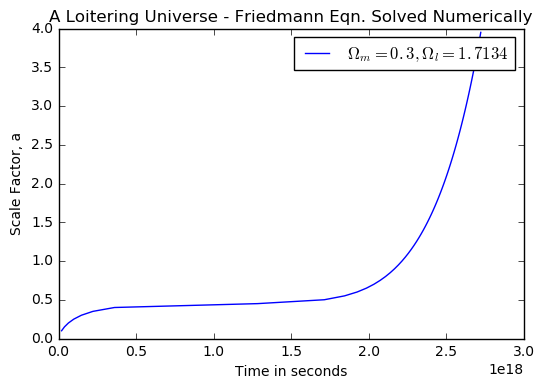

In [270]:
def F(a):
    return (1/H_0)*(1/np.sqrt(O_r*a**-2 + O_m*a**-1 + O_k + O_l*a**2))


a_list_2 = []
t_list_2 = []

for a in np.arange(0.1,4,0.05):
    time, err = quad(F,0,a)
    a_list_2.append(a)
    t_list_2.append(time)
    
plt.plot(t_list_2,a_list_2, label="$\Omega_m = 0.3, \Omega_l = 1.7134$")
plt.ylabel("Scale Factor, a")
plt.xlabel("Time in seconds")
plt.title("A Loitering Universe - Friedmann Eqn. Solved Numerically")
plt.legend()
plt.show()

b.) Way too much time went into figuring out how to deal with negative sqrt values. This solution isn't pretty, but it works.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


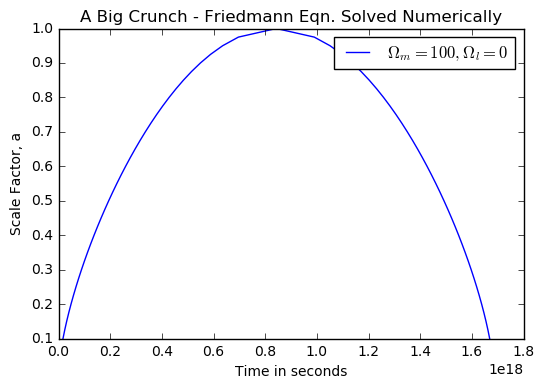

In [272]:
def F(a):
    return (1/H_0)*(1/np.sqrt(0*a**-2 + 0.3*a**-1 + 0 - 0.3*a**2))

def G(a):
    return (1/H_0)*(1/-np.sqrt(0*a**-2 + 0.3*a**-1 + 0 - 0.3*a**2))


a_list_2 = []
t_list_2 = []
a_list_3 = []
t_list_3 = []

for a in np.arange(0.1,1.5,0.025):
    time, err = quad(F,0,a)
    a_list_2.append(a)
    t_list_2.append(time)

for i in range(0,len(t_list_2)):
    if not np.isnan(t_list_2[i]):
        t_inflection = t_list_2[i]
    
for a in np.arange(0.1,1.5,0.025):
    time, err = quad(G,0,a)
    a_list_3.append(a)
    t_list_3.append(time)
    
t_list_3 = [x+2*t_inflection for x in t_list_3]

plt.plot(t_list_2,a_list_2, label="$\Omega_m = 100, \Omega_l = 0$")
plt.plot(t_list_3,a_list_3, color="blue")
plt.ylabel("Scale Factor, a")
plt.xlabel("Time in seconds")
plt.title("A Big Crunch - Friedmann Eqn. Solved Numerically")
plt.legend()
plt.show()

# Problem 2

To begin, compute the mass enclosed at a radius r in the isothermal sphere -- $M(r) = \rho(r)\frac{4}{3}\pi r^3$

Substitute in the given equation for $\rho$ -- $M(r) = \frac{2 \sigma_v^2}{3 G} r$

Use the small angle approximation to get $M(r)$ in terms of $\theta$ -- $M(\theta) = \frac{2\sigma_v^2}{3 G} \theta D_l$

The equation for an Einstein ring is -- $\theta^2 = \frac{4 G M}{c^2} \frac{D_{ls}}{D_l D_s}$

Insert our equation for $M$, and simplify -- $\theta^2 = \frac{8 D_{ls}}{3 c^2 D_s} \sigma_v^2$

Solve for $\sigma_v$ to get -- $\sigma_v = \sqrt{\frac{3 c^2 \theta D_s}{8 D_{ls}}}$

$\theta$ is currently in radians. We convert to $\frac{arcseconds}{28''}$ by multiplying by $\frac{28}{206265}$. Then, bring it outside the square root to get -- $\sigma_v = c \sqrt{\frac{3 * 28}{8 * 206265}} \sqrt{\frac{\theta}{28"}\frac{D_s}{D_{ls}}} = 2140.4 \sqrt{\frac{\theta}{28"}\frac{D_s}{D_ls}} \approx 10^3 \sqrt{\frac{\theta}{28"}\frac{D_s}{D_{ls}}}$